# CC5215: Privacidad de Datos
## Proyecto grupal - Entregable 1

## Miembros del grupo

Ingrese los nombres de lxs miembros del grupo. Recuerde que el grupo debe tener un máximo de 3 miembros y la constitución del grupo **no se puede cambiar** a lo largo de los distintos entregables. 

*   Miembro 1: Diego Pizarro
*   Miembro 2: Jorge Barraza
*   Miembro 3: Romina Rodríguez


## Objetivo general
El objetivo de esta primera parte del trabajo grupal es que identifiquen un dataset público con información sensible de individuos, donde el dataset sea susceptible a violaciones de la privacidad, y propongan un método de publicación del dataset que evite estas violaciones de privacidad.

## Parte 1: Identificación del dataset [15 Puntos]
Identifique un dataset de dominio público, con información sensible de individuos. El datset no debe contener ningún identificador explícito.

Como fuente de datasets, le podrían ser útiles las siguientes páginas web: 
*   https://www.kaggle.com/
*   https://datos.gob.cl/
*   https://www.consejotransparencia.cl/datosabiertos/

Note que esta páginas son sólo sugerencias; pueden obtener su datasets de cualquier fuente públicamente accesible.

In [1]:
# Load the data and libraries
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# Complete acá su código 
dataset = pd.read_csv('https://raw.githubusercontent.com/dpizarrow/CC5215-Project/main/Juvenile_Arrests.csv?token=GHSAT0AAAAAAB2DIKKZXN6YFQNBSSKJYWYCZBTNAOA')

Limpie el dataset, eliminando las columnas que no sean de interés para este trabajo grupal, los registros que estén incompletos (con e.g. nan o null en alguna de sus celdas) y, en caso de que sea necesario, formateando (correcta y uniformemente) las celdas que presenten problemas. 

In [2]:
dataset.columns

Index(['Record Count', 'Month/Year', 'Incident ID', 'Agency Code', 'Charge',
       'Date Arrested', 'Time Arrested', 'Age', 'Race', 'Sex', 'Ethnicity',
       'Reisdence', 'Case Nummber', 'GeoX', 'GeoY', 'Arrest Type',
       'Arrest Description', 'Tract', 'Tract Description', 'Zone',
       'Zone Description', 'District', 'District Description', 'Report Area',
       'Report Area Description', 'Neighborhood', 'Neighborhood Description',
       'Sub-division', 'Sub-division Description', 'Drug/Alchohol', 'Weapon',
       'Weapon Description', 'Disposition', 'Disposition Description',
       'Street Direction', 'Street', 'City', 'State', 'Zip Code',
       'GeoReference', 'FLPD Police Districts', 'Neighborhood Associations',
       'City Commission Districts - 2020', 'Police Districts - 2020',
       'Neighborhood Associations - 2020'],
      dtype='object')

In [3]:
len(dataset)

2938

In [4]:
cols_to_keep = [
    'Charge',
    'Date Arrested',
    'Age',
    'Race',
    'Sex',
    'Arrest Description',
    'Disposition Description',
    'Zip Code',
]

In [5]:
dataset = dataset[cols_to_keep]

In [6]:
# Se eliminan los valores nulos
dataset = dataset.dropna()

In [7]:
dataset = dataset.reset_index(drop = True)

In [31]:
dataset

,Charge,Date Arrested,Age,Race,Sex,Arrest Description,Disposition Description,Zip Code
0,BURGL-CONVEYANCE UNOCCUPIED/UNARMED,07/01/2017 12:00:00 AM,14.0,B,M,PHYSICAL / IN CUSTODY,CLEARED BY ARREST,33301.0
1,BATTERY-TOUCH OR STRIKE,06/04/2019 12:00:00 AM,14.0,B,M,OUT OF CUSTODY,CAPIAS REQUEST,33064.0
2,BATTERY-ON OFFICER FIREFIGHTER EMT ETC,10/28/2015 12:00:00 AM,16.0,B,F,PHYSICAL / IN CUSTODY,CLEARED BY ARREST,33311.0
3,RESIST OFFICER-WITH VIOLENCE F,05/11/2015 12:00:00 AM,16.0,B,M,PHYSICAL / IN CUSTODY,CLEARED BY ARREST,33311.0
4,BURGL-STRUCTURE UNOCCUPIED/UNARMED,01/16/2018 12:00:00 AM,17.0,B,M,PHYSICAL / IN CUSTODY,CLEARED BY ARREST,33312.0
...,...,...,...,...,...,...,...,...
2595,ROBBERY-CARJACKING WITHOUT FIREARM OR WEAPON,09/02/2016 12:00:00 AM,16.0,B,M,OUT OF CUSTODY,CAPIAS REQUEST,33304.0
2596,ACTIVE WARRANT-FALSE IMPRISONMENT-NO BOND,09/19/2019 12:00:00 AM,17.0,W,F,PHYSICAL / IN CUSTODY,CLEARED BY ARREST,33312.0
2597,ROBBERY-NO FIREARM OR WEAPON,08/31/2015 12:00:00 AM,15.0,B,M,PHYSICAL / IN CUSTODY,CLEARED BY ARREST,33311.0
2598,LARC-GRAND THEFT 300 LESS THAN 5K DOLS,07/01/2016 12:00:00 AM,17.0,W,M,PHYSICAL / IN CUSTODY,CLEARED BY ARREST,33304.0


In [9]:
# Se verifica que no existan nulos
dataset.isna().sum()

Charge                     0
Date Arrested              0
Age                        0
Race                       0
Sex                        0
Arrest Description         0
Disposition Description    0
Zip Code                   0
dtype: int64

In [10]:
len(dataset)

2600

Describa coloquialmente los datos que contiene el dataset (de dónde fueron obtenidos, qué representa cada columna, etc.)

> El dataset corresponde a arrestos de juveniles en la ciudad de Fort Lauderdale, Florida, EEUU. Contine 2600 datos de arrestos luego de la limpieza del dataset. Estos datos fueron obtenidos de la pagina [Fort Lauderdale Police Department - Open Data Portal](https://fortlauderdale.data.socrata.com/Police/Juvenile-Arrests/5tgj-en5g), y la ultima actualización fue el año 2020. \\

> Las columnas resultantes posterior a la limpieza son:
  - Charge (string): Motivo del arresto
  - Date Arrested (datetime): Fecha del arresto
  - Age (int): Edad de la persona arrestada
  - Race (string): Raza de la persona arrestada
  - Arrest Description (string): Descripción del arresto
  - Zip Code (int): Código postal de la persona arrestada
  - Disposition Description (string): Resultado o última actualización del arresto

Clasifique cada columna en cuasi-identificador, atributo sensible y atributo no-sensible. Si lo desea, puede simplificar el trabajo directamente eliminando los atributos no-sensibles del dataset. 

> Los atributos sensibles son el cargo (Charge), la fecha del arresto (Date Arrested), la descripción del arresto (Arrest Description), la raza de la persona arrestada (Race) y la descripción de la última actualización del arresto (Desposition Description).
Los quasi-identificadores son la edad (Age), el sexo (Sex) y el código zip (Zip Code).
Las columnas con los atributos no sensibles fueron eliminadas del dataset.

## Parte 2: Descripción del problema [15 Puntos]
Demuestre que existen potenciales violaciones de privacidad (recuerde que el requisito original era que el dataset escogido presente este tipo de problemas) y explique tanto su razonamiento para encontras dichas vulnerabilidades como los resultados obtenidos.



> Como fue visto en clases, datos como el código ZIP, edad, y sexo de una persona tienen el potencial de identificar casi unívocamente a un individuo. Es por esto que el dataset publicado presenta potenciales violaciones de privacidad.
Dado que se tiene el grupo de cuasi-identificadores ‘Age’, ‘Sex’ y ‘Zip Code’, es posible que una persona que conozca esta información de un individuo, use dichos datos para así obtener la descripción del crimen que cometió, la ubicación de este, y también la fecha en la que fue arrestado, datos que son altamente sensibles.

In [11]:
def k_anonymity(df, qis):
  # Retorna la k-anonimidad de un dataset dato un grupo de cuasi-identificadores
  return df.groupby(by=qis).size().min()

In [12]:
qis = ["Age", "Sex", "Zip Code"]

print(f'El dataset es {k_anonymity(dataset, qis)}-anonimo para los cuasi-identificadores {qis}.')

El dataset es 1-anonimo para los cuasi-identificadores ['Age', 'Sex', 'Zip Code'].


> Usando la definción de $k$-anonimidad vista en clases, se puede ver que este dataset es 1-anónimo para el grupo de cuasi-identificadores definido anteriormente. Además, se puede determinar el crimen que cometió una persona de este dataset, la fecha en la que ocurrió el crimen, y la descripción del arresto en base a los cuasi-identificadores definidos.
A continuación se realiza una consulta maliciosa para encontrar los datos de arresto de un niño de 8 años. Se sabe que este dataset sólo incluye crímenes procesados en FT LAUDERDALE, donde este niño reside, por lo que se conoce su Zip Code, edad y raza, y se procese a consultar al dataset.

In [13]:
dataset.loc[dataset['Age']==8][dataset['Sex']=='M'][dataset['Zip Code']==33311.0]

,Charge,Date Arrested,Age,Race,Sex,Arrest Description,Disposition Description,Zip Code
2175,BATTERY/ON ELECTED OFF OR EDUC DCF OR CONTRCT...,03/13/2015 12:00:00 AM,8.0,B,M,PHYSICAL / IN CUSTODY,CLEARED BY ARREST,33311.0


> La consulta anterior nos dice que el día 13 de marzo del año 2015 a las 12AM, este chico fue arrestado y llevado a custodia por la FLPD, por el crimen de agresión a un oficial o empleado, que fue llevado a custodia, y que finalmente fue 'CLEARED BY ARREST', lo que significa que fue llevado a la corte por su crimen. A la fecha este joven debe tener 16 o 17 años, y su información de arresto sigue siendo pública.

## Parte 3: Anonimización [30 Puntos]

Utilice técnicas de anonimización para transformar el dataset de la Parte 1 (luego de la limpieza), en uno que sea robusto a los ataques que montó en la Parte 2. Para ello, transforme el dataset primero en uno $k$-anónimo, y luego en uno $\ell$-diverso, para valores que $k$ y $\ell$ que resulten en un tradeoff razonable entre privacidad y utilidad. Haga las generalizaciones de manera "informada", explorando las características de los valores atípicos. 

In [14]:
def generalize(df, depths):
  # Retorna el dataset reemplazando los n dígitos menos significativos por ceros, según lo especificado en 'depths'
  df_copy = df.copy()
  for key in depths:
    df_copy[key] = (df_copy[key]//10**depths[key])*10**depths[key]
  return df_copy

In [15]:
def generalize_by_intervals(df, col, interval_size):
    """
    Returns a copy of `df` where the column 'col' is generalized in a way such 
    that every value is transformed to an interval of size `interval_size`
    """
    new_df = df.copy()
    new_df[col] = new_df[col].map(lambda val: val // interval_size * interval_size)
    return new_df

In [16]:
dataset_gen = generalize(dataset, {'Zip Code': 3})
dataset_gen = generalize_by_intervals(dataset_gen, 'Age', 4)
k_anonymity(dataset_gen, ['Age', 'Sex', 'Zip Code'])


9

In [17]:
dataset_gen = dataset_gen.drop('Zip Code', axis=1)

<Axes: >

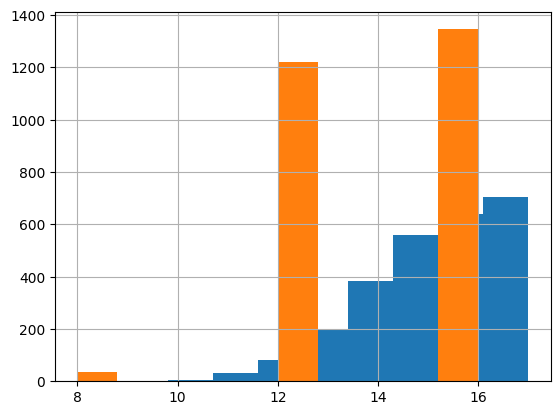

In [18]:
dataset['Age'].hist()
dataset_gen['Age'].hist()

In [19]:
import math
import numpy as np

def l_entropic_diversity(df, qis, target):
    """
    Computes the entropic diversity of a dataframe given the QIDs qis, and the sensitivity attribute target.
    """
    new_df = df.copy()
    # Calculate prob * log(prob) for each probability
    new_df = new_df.groupby(qis)[target].value_counts(normalize=True).map(lambda value: -value * math.log(value)).reset_index(name='Val')
    # print(new_df.groupby(qis)['Val'].sum().reset_index(name='Entropic diversity log'))
    # Sum all previously calculated values for each QIds group
    entropic_diversities = new_df.groupby(qis)['Val'].sum()
    # Get minimum entropic diversity
    entropic_diversity_min = entropic_diversities.min()
    return entropic_diversity_min

In [20]:
l_entropic_diversity(dataset_gen, ['Age', 'Sex'], 'Arrest Description')

0.30509462619813377

In [21]:
l_entropic_diversity(dataset_gen, ['Age', 'Sex'], 'Charge')

1.7351264569629226

In [22]:
def compute_diversity_index(df, qis, target):
  # Returns the minimum diversity index in a dataset for a given sentitive target and QIDs
  return df.groupby(by=qis).nunique(1)[target].min()

In [23]:
compute_diversity_index(dataset_gen, ['Age', 'Sex'], 'Charge')

6

In [24]:
compute_diversity_index(dataset_gen, ['Age', 'Sex'], 'Arrest Description')

2

In [25]:
compute_diversity_index(dataset_gen, ['Age', 'Sex'], 'Date Arrested')

8

In [26]:
compute_diversity_index(dataset_gen, ['Age', 'Sex'], 'Race')

1

In [27]:
compute_diversity_index(dataset_gen, ['Age', 'Sex'], 'Disposition Description')

2

Describa coloquialmente las generalizaciones que realizó (justificando las decisiones que tomaron), y los valores de $k$ y $\ell$ que obtuvo. Describa, además, cuáles fueron los mayores desafíos/obstáculos que encontró en este proceso de anonimización. 

> Lo primero que se hizo fue definir dos funciones: generalize, que generaliza una columna reeplazando los $n$ dígitos más significativos por ceros. La otra función que se definió fue la función generalize_by_intervals, generalizando cada columna en intervalos de tamaño definido. 

> Se partió utilizando la función generalize para generalizar la columna Zip de los datos, a profundidad 3. Si bien hacer esta generalización es casi equivalente a eliminar esta columna del dataset, hay sufiente información en las otras columnas del dataset como para no perder bastante utilidad en los datos al hacer esta generalización. Además, hay otras columnas en el dataset previo a la limpieza relacionadas a la ubicación en el que ocurrió el arresto, por lo cual se podría recuperar información de ser necesaria, aún cuando se generaliza la columna Zip.

> El siguiente paso que se realizó fue generalizar la columna Age. Para determinar el tamaño de los intervalos, primero se creó un histograma de edades para ver la distribución. Luego se decidió utilizar un tamaño de intervalo de 4, haciendo otro histograma para ver como era la distrubución nueva. Viendo el gráfico creado más arriba, se puede ver que con el tamaño de intervalos definidos, se logra capturar un gran rango de edades entre los intervalos, por lo cual la pérdida de utilidad no es tanta considerando esta generalización. 

> Con estos cambios, se logró que el dataset fuera 10-anónimo para los cuasi-identificadores definidos, lo cual es una mejora significativa con respecto al 1-anonimato del dataset original. Con estos cambios, se lograron los siguientes valores de $l$-diversidad:

- 6 para Charge
- 2 para Arrest Description
- 8 para Date Arrested
- 1 para Race
- 2 para Disposition Description

> Debido a que la columna Race tiene solamente dos valores, se determinó que eliminar esta columna no iba a impactar significativamente la utilidad de los datos, con lo cual la diversidad final del dataset es 2.

> Uno de los desafíos que encontramos fue que la l-diversidad nos daba 1
para los valores sensibles que habíamos escogido inicialmente. En específico, para la raza de las personas arrestadas. Otra dificultad fue que dado que los crímenes son de una ciudad en específico en el estado de Florida, los códigos zip son muy parecidos, lo que nos obligó a generalizar este valor al punto en el que ya no tiene utilidad, ya que todos los valores son iguales, para poder obtener una buena k-anonimidad.